<a href="https://colab.research.google.com/github/tenzingsherpaa/Exoplanets/blob/main/Tenzing_Sherpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Exploring Kepler’s Confirmed Planets Database__
==========================

Now that you have an understanding of stellar light curves and what we can learn from them, let’s explore some archived Kepler data for confirmed planets. To start, visit [this following link](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS). 

This will bring you to the search page for the database of confirmed planets. We are going to set some parameters in order to limit our search to large, short period planets with deep transit depths (which, as you discovered earlier, are the easiest planets to detect with this method). In order to do so, take the following steps: 

(Note: This part of the activity works best if your browser is maximized)

1. In the column titled "Planet Radius [Jupiter radii]", type in  > 0.8. Note that this is in units of Jupiter radii. This value will ensure that the depth of our transit signal is deep and easy to detect.
2. In the column titled "Orbital Period [days]", let's make it less than 20, say. For this, you have to type < 20. This will make it more likely that you'll see multiple transits during your observation.
3. Let's just look at planets that have been observed by Kepler, so in the "Host Name" column, write "kepler". This way, we can go and readily look at the Kepler light curves which have all been made public.
4. As an example, let's choose Kepler 435. To find it easily, click on the down arrow button in the "Planet Radius" column to sort by decreasing radii. (You'll later choose your own planet to present on, so make sure to refer back to these instructions.)
5. Clicking on the name will bring you to a page with more detailed information on your planet. Among this information, you'll find  estimates quoted from the literature for various parameters, and even some images in the top right of what that region of sky looks like in different wavebands (you may want to include these images in your presentation for whichever planet you choose). 
6. Note at the top of the page, under the heading "Object and Aliases", there will be some information on what name that system is cross-listed as in a few different telescopes and catalogs. (Write down these names!) Find the Kepler ID number (KepID). In our case, this is "7529266  b". Make note of this number so you can easily search for your planet in the future.
7. You can look at the light curve data for your planet by clicking on the "Kepler Target" icon next to the "Kepler-435 Stellar Parameters" heading at the top of the page. Under the column labeled "Mission", click on the "Kepler Time Series" option with the graph icon. 
8. By default, it will plot for you in the x-axis column "TIME", and in the y-axis column it plots "PDCSAP_FLUX [e-/s]". This is the light curve! Play around with the other possible columns for your x and y inputs. You can zoom in on different parts of the light curve using the cursor. 
9.	Once you are happy with how it looks, download a PNG of the light curve using the Download Graph icon at the bottom of the plot. Note that you can save multiple snapshots like this, for instance, if you want a zoomed-in and zoomed-out view, or if you want to plot a phase graph and a time graph. 




Congratulations; you’ve just characterized a real planet!  You’ve now joined hundreds of astronomers around the world who use Kepler data to further our understanding of exoplanets. 
_________________________________________

Plotting on your own
--------------------
If you want more freedom when making your plots, you can do the following to plot an example light curve yourself!

In [ ]:
import numpy as np # math package
import matplotlib.pyplot as plt # plotting package
import os # talks to your computer
import pandas as pd # works with tables of data

## NOTE: you will need to add a shortcut for the data files in the project 
## folder to YOUR own Google drive. Right click on the file to do this. You may
## need to grant Google collab access to your drive.
from google.colab import drive 
drive.mount('/content/gdrive')
path  = "gdrive/My Drive/"

Mounted at /content/gdrive


From the graph made for you above, once you've zoomed in to an appropriate region and plotted the desired columns, you can download the data currently in that graph window as a table, so that you can make your own more unique and sophistacated graph. I've already downloaded an example file for Kepler435b called "KIC_7529266.tbl". This file contains light curve data for the first 300 days or so. 

In [ ]:
## read-in the example Kepler data from your Google drive
Kepler435b = pd.read_csv(path + "KIC_7529266.tbl", skiprows=3, delimiter='\s+',names=['=','T'])

print(Kepler435b.columns) # this tells you what each of the columns are named. For some reason, they're called '\\fixlen','=', & 'T'
Kepler435b         # show me what this table looks like

Index(['=', 'T'], dtype='object')


,=,T
0,131.512322,-0.000019
0,131.532757,0.000124
0,131.553191,0.000101
0,131.573625,-0.000039
0,131.594060,0.000006
...,...,...
0,279.207039,0.000063
0,279.227471,-0.000107
0,279.247904,-0.000244
0,279.268337,0.000245


In [ ]:
time = Kepler435b["="] # let the "time" data be the "=" column in the Kepler435b table
data = Kepler435b["T"] # let the brightness information (called "data") be the "T" column in the Kepler435b table

In [ ]:
def square_dip(t, array, mass, depth, period, start):
    '''
    t: The array for our x values (representing time)
    array: Our y-values! This allows us to have more
           than one planet :)
    mass: How large we want our planet to be!
          (Make this a number between 4 and 12)
    depth: How much should our planet dim the brightness?
           (Pick a value between 0.5 and 0.98)
    period: How frequently do we want this to happen?
    '''    
    
    transit_expected = array.copy()

    stop = start + mass
    while stop < len(t):
        transit_expected[start:stop] = depth
        start += period
        stop = start + mass
    return transit_expected


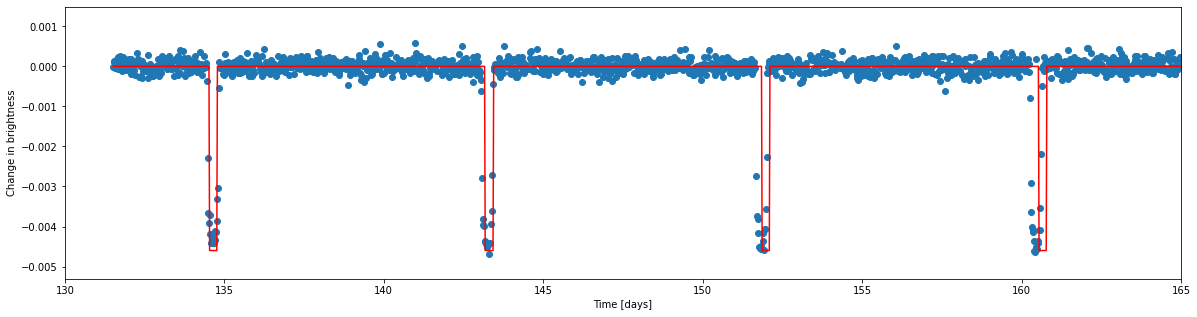

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(time,data) # telling it to plot time on the x-axis and data on the y-axis

# fit the dips yourself!
## you need to choose parameters for the mass, period, and start yourself
## using trial and error
## you can estimate the depth and the start time by looking at a plot
## of the data
star = np.zeros(len(time))
planet = square_dip(time, star, 12, -0.0046, 417, 147)
plt.plot(time,planet,color='r')

plt.xlabel('Time [days]') # add a name for the x-axis
plt.ylabel('Change in brightness') # add a name for the y-axis

# you can look at a smaller range of x-values 
# (and see fewer periods) by changing xlim 
## play around with changing the range of x and y values
plt.xlim(130,165) 

plt.show()

It worked! Notice that our model (the red line) doesn't go as deep as the light curve, but that's okay.

Challenge: downloading your own exoplanet data
--------------

If you want a challenge, you can download your own exoplanet data from the Kepler website and choose your own exoplanet to analyze. Click on the Table Download icon at the bottom of the plotting screen. This will download the column data shown in your plot in a file called "plot.tbl". Remember that you can zoom-in on certain parts of the plot first before downloading the data.

In [ ]:
## this uploads a file from your computer into Google colab
## choose the file you downloaded from the Kepler website called "plot.tbl"
from google.colab import files
uploaded = files.upload()

Saving plot.tbl to plot (1).tbl


In [ ]:
Kepler_TEST = pd.read_csv("plot.tbl", skiprows=3, delimiter='\s+',names=['=','T'])

In [ ]:
print(Kepler_TEST.columns)

Index(['=', 'T'], dtype='object')


In [ ]:
time_TEST = Kepler_TEST["="] 
data_TEST = Kepler_TEST["T"]

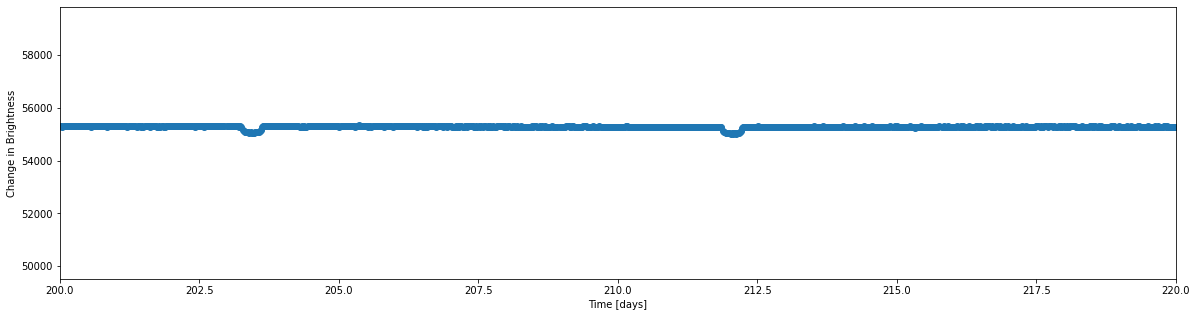

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(time_TEST,data_TEST)

#star = np.zeros(len(time))
#planet = square_dip(time, star, 12, -0.0046, 417, 147)
#plt.plot(time,planet,color='r')

plt.xlabel('Time [days]') 
plt.ylabel('Change in Brightness')

plt.xlim(200,220) 

plt.show()